In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def func(u,beta,y,R_m=4.0e03,R_d=2.0e03):
    exp = np.exp(-y*np.cos(u)*np.cosh(beta) - R_m/(2.*R_d*y*np.cos(u)*np.cosh(beta)))
    t1 = R_m/(2.*R_d*y**2.*np.cos(u)**2.*np.cosh(beta)**2.) -1.
    t2 = np.cos(2.*u) + 1.
    f = t1*t2*exp
    return f
def func_II(u,beta,y,R_m=4.0e03,R_d=3.2e03):
    exp = np.exp(-y*np.cos(u)*np.cosh(beta) - R_m/(2.*R_d*y*np.cos(u)*np.cosh(beta)))
    t1 = R_m/(2.*R_d*y**2.*np.cos(u)**2.*np.cosh(beta)**2.) -1.
    t2 = np.cos(2.*u) + 1.
    f = t1*t2*exp
    return f

In [3]:
y = np.linspace(0.1,15.,100)

In [4]:
def Vc_ad_ISM_I(l):
    Integral_ISM = []
    for i in range (0,len(l)):
        integrando = lambda beta,u: func(u,beta,l[i])
        result = integrate.dblquad(integrando,0,np.inf,lambda u: 0, lambda u: np.pi/2.)[0]
        Integral_ISM.append(result)
    return np.sqrt(l**2.*Integral_ISM)
def Vc_ad_ISM_II(l):
    Integral_ISM = []
    for i in range (0,len(l)):
        integrando = lambda beta,u: func_II(u,beta,l[i])
        result = integrate.dblquad(integrando,0,np.inf,lambda u: 0, lambda u: np.pi/2.)[0]
        Integral_ISM.append(result)
    return np.sqrt(l**2.*Integral_ISM)

In [5]:
res = []
for i in range (0,len(y)):
    integrando = lambda beta,u: func(u,beta,y[i])
    result = integrate.dblquad(integrando,0.1,np.inf,lambda u: 0, lambda u: np.pi/2.)[0]
    res.append(result)
print res

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


[1.3065668419876967e+141, 3.825823645282012e+55, inf, inf, inf, inf, inf, 3.8349398336454126e+101, 2.776726014820055e+89, 6.42528965028961e+79, 9.397429839444156e+71, 2.9942366642947424e+65, 1.0026518993482148e+60, 2.1068689595534173e+55, 1.909107842285271e+51, 5.641314235560103e+47, 4.395829985544611e+44, 7.663644203942236e+41, 2.6270504306370824e+39, 1.5975089177207032e+37, 1.5860078593063086e+35, 2.402419686258799e+33, 5.251114132837511e+31, 1.5811733972846362e+30, 6.308993366921904e+28, 3.2280940203609784e+27, 2.0597986821548882e+26, 1.6004107706278602e+25, 1.4833571921719577e+24, 1.6111941536153293e+23, 2.019404553684829e+22, 2.8814042656520033e+21, 4.6252982423905586e+20, 8.265897812242142e+19, 1.629438294583238e+19, 3.5141139894508196e+18, 8.230848546913549e+17, 2.0800888502037443e+17, 5.638696357692918e+16, 1.6309571522701346e+16, 5009632172737688.0, 1627042837935950.2, 556579518918675.9, 199825330042910.12, -142691936.1622643, -201143855.47422034, -283730911.7810591, -21185583

In [5]:
G = 4.302e-3
Sigma_g_I = 1905.*0.25
Sigma_g_II = 536.*0.25
R_d_I = 2.0e03
R_d_II = 3.2e03
C_I = 4.*G*Sigma_g_I*R_d_I/np.pi
C_II = 4.*G*Sigma_g_II*R_d_II/np.pi

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


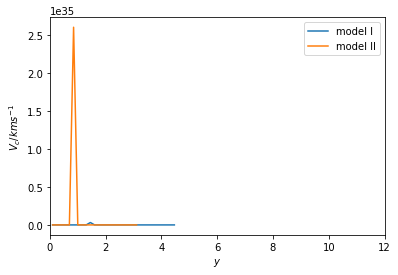

In [7]:
plt.plot(y,np.sqrt(C_I)*Vc_ad_ISM_I(y),label='model I')
plt.plot(y,np.sqrt(C_II)*Vc_ad_ISM_II(y),label='model II')
xlim(0.,12.)
plt.xlabel(r'$y$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


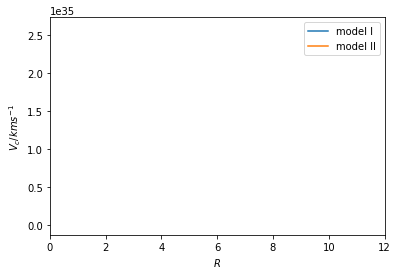

In [8]:
R_I = 2.*R_d_I*y
R_II = 2.*R_d_II*y
plt.plot(R_I,np.sqrt(C_I)*Vc_ad_ISM_I(y),label='model I')
plt.plot(R_II,np.sqrt(C_II)*Vc_ad_ISM_II(y),label='model II')
xlim(0.,12.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

In [9]:
print Vc_ad_ISM_I(y)

[1.03731859e+22 3.07825686e+08 1.38831591e+05 4.31831002e+03
 6.10783000e+02 1.84239467e+02 1.52398548e+19 3.53490570e+16
 3.33891145e+14 4.36460305e+31 3.49381175e+28 9.51697724e+25
 6.59915942e+23 9.48688894e+21 2.43547335e+20 9.99088677e+18
 6.01882085e+17 4.98814488e+16 1.73318454e+06 7.51472140e+05
 1.21080525e+14 1.78387995e+05 9.56693411e+04 5.41007831e+04
 3.20373219e+04 1.97285181e+04 1.25106671e+04 8.00007938e+03
 4.81860408e+03 1.44019473e+03            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan         

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [10]:
Integral_ISM = []
for i in range (0,len(y)):
    integrando = lambda beta,u: func(u,beta,y[i])
    result = integrate.dblquad(integrando,0,np.inf,lambda u: 0, lambda u: np.pi/2.)[0]
    Integral_ISM.append(result)
print Integral_ISM

[1.0760298519456072e+46, 1.509999274456434e+18, 119857710500.01424, 61307377.52916923, 756963.017513087, 46703.65127119391, 2.3085195236274448e+38, 9.390610942568921e+32, 6.555830373746569e+28, 9.003988006287407e+62, 4.738289558513987e+56, 2.9387923891191656e+51, 1.1986815726062153e+47, 2.1279551716658102e+43, 1.2176830763831744e+40, 1.7958777100729598e+37, 5.7589032564602065e+34, 3.520276189777072e+32, 380678213875.6237, 64470481995.80022, 1.5156523795414653e+27, 2993192081.148205, 786599803.348051, 230734680.42696694, 74484878.06358589, 26086964.699079316, 9718387.09979194, 3691841.1532548633, 1247537.8613490453, 104056.27755144733, -573745.8224659753, -1125309.665120107, -1715242.0591849089, -2450900.1102723363, -3431130.6755161076, -4771664.355680544, -6623998.91450171, -9195053.392085323, -12771828.64482844, -17754725.523491643, -24703732.21088073, -34403021.99917273, -47951596.85108189, -66891196.90511763, -93383095.91657805, -130463879.5188284, -182397411.23592597, -255175111.52

In [11]:
def inte_R_I(u,beta,R,R_m=4.0e03,R_d=2.0e03):
    exp = np.exp(-R*np.cos(u)*np.cosh(beta)/(2.*R_d) - R_m/(R*np.cos(u)*np.cosh(beta)))
    t1 = (2.*R_m*R_d)/(R**2.*np.cos(u)**2.*np.cosh(beta)**2.) - 1.
    t2 = np.cos(2.*u) + 1.
    return t2*t1*exp
def inte_R_II(u,beta,R,R_m=4.0e03,R_d=3.2e03):
    exp = np.exp(-R*np.cos(u)*np.cosh(beta)/(2.*R_d) - R_m/(R*np.cos(u)*np.cosh(beta)))
    t1 = (2.*R_m*R_d)/(R**2.*np.cos(u)**2.*np.cosh(beta)**2.) - 1.
    t2 = np.cos(2.*u) + 1.
    return t2*t1*exp

In [8]:
R = np.linspace(0.1,15.,100)

In [13]:
#no creo que esté bien esto
integral_ISM_R = []
for i in range (0,len(R)):
    integrand = lambda beta,u: inte_R_I(u,beta,R[i])
    resultado = integrate.dblquad(integrand,0,np.inf,lambda u: 0, lambda u: np.pi/2.)[0]
    integral_ISM_R.append(resultado)
print integral_ISM_R

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


In [14]:
def func_R_I(u,beta,R,R_m=4.0e03,R_d=2.0e03):
    exp1 = np.exp(-(R*np.cos(u)*np.cosh(beta))/(2.*R_d))
    exp2 = np.exp(-R_m/(R*np.cos(u)*np.cosh(beta)))
    t1 = (2.*R_m*R_d)/(R**2.*np.cos(u)**2.*np.cosh(beta)**2.) - 1.
    t2 = np.cos(2.*u) + 1.
    return exp1*t1*t2*exp2

In [22]:
fun = []
t = np.pi/2.-0.1
for i in range (0,len(R)):
    integ = lambda beta,u: func_R_I(u,beta,R[i])
    resul = integrate.dblquad(integ,0.1,np.inf,lambda u: 0.1, lambda u: t)[0]
    fun.append(resul)
print fun

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


In [10]:
def function(u,beta,y,R_m=4.0e03,R_d=2.0e03):
    exponencial = np.exp(-y*np.cos(u)*np.cosh(beta)-R_m/(2.*y*R_d*np.cos(u)*np.cosh(beta)))
    t1 = R_m/(2.*y**2.*R_d*np.cos(u)**2.*np.cosh(beta)**2.) - 1.
    t2 = np.cos(2.*u) + 1.
    return t2*t1*exponencial

In [11]:
fu = []
for i in range(0,len(R)):
    integrando = lambda beta,u: function(u,beta,R[i])
    result = integrate.dblquad(integrando,0,np.inf,lambda u: 0, lambda u: np.pi/2.)[0]
    fu.append(result)
print fu

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


[1.0760298519456072e+46, 1.509999274456434e+18, 119857710500.01424, 61307377.52916923, 756963.017513087, 46703.65127119391, 2.3085195236274448e+38, 9.390610942568921e+32, 6.555830373746569e+28, 9.003988006287407e+62, 4.738289558513987e+56, 2.9387923891191656e+51, 1.1986815726062153e+47, 2.1279551716658102e+43, 1.2176830763831744e+40, 1.7958777100729598e+37, 5.7589032564602065e+34, 3.520276189777072e+32, 380678213875.6237, 64470481995.80022, 1.5156523795414653e+27, 2993192081.148205, 786599803.348051, 230734680.42696694, 74484878.06358589, 26086964.699079316, 9718387.09979194, 3691841.1532548633, 1247537.8613490453, 104056.27755144733, -573745.8224659753, -1125309.665120107, -1715242.0591849089, -2450900.1102723363, -3431130.6755161076, -4771664.355680544, -6623998.91450171, -9195053.392085323, -12771828.64482844, -17754725.523491643, -24703732.21088073, -34403021.99917273, -47951596.85108189, -66891196.90511763, -93383095.91657805, -130463879.5188284, -182397411.23592597, -255175111.52

In [8]:
def asterisco(x,l,R,R_m=4.0e03,R_d=2.0e03):
    exponencial = np.exp(-(R*x*l)/(2.*R_d)-(R_m)/(R*x*l))
    den = np.sqrt(1.-x**2.)*np.sqrt(l**2. - 1.)
    t = R_m/(R**2.*x**2.*l**2) - 1./(2.*R_d)
    return exponencial*t/den

In [9]:
R = np.linspace(0.1,15.,100)

In [10]:
f = []
for i in range(0,len(R)):
    integrando = lambda l,x: asterisco(x,l,R[i])
    result = integrate.dblquad(integrando,1,np.inf,lambda x: 0, lambda x: 1)[0]
    f.append(result)
print f

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
